In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Unsupervised Learning

In unsupervised learning we have a set of features, $X_1, X_2,..., X_p$ but we are not interested in prediciton because we do not have an associated response variable $Y$. Rather than prediction, the goal is to discover interesting things about the measurements on $X_1, X_2,..., X_p$.

Some interesting things include:
* Is there and informative way to visualize the data?
* Can we discover subgroups among the variables or among the observations?

In this chapter we discuss **_principal components analysis_**, a tool used for data visualization or data pre-processing before supervised techniques are applied. And **_clustering_**, a broad class of methods for discovering unknown subgroups of data.

Unsupervised learing is often performed as part of an exploratory data analysis.

One of the challenges with unsupervised learning is we do not have as clear of understanding of how to assess the quality of the results obtained as we do in supervised learning (i.e. cross-validation, validation on an independent test set, etc.)

**Principal Component Analysis (PCA)** refers to the process by which principal components are computed, and the subsequent use of these components in understanding the data. You can use these derived variables in supervised learning, as we did in Chapter 6 with Principal Components Regression. But this chapter will focus on using PCA as a tool unsupervised data exploration.

With PCA you should standardize each variable to have mean zero and standard deviation one. Otherwise our loading may be innacurate because our variables could be measure on different scales.

Similar to our previous principal components work, our first principal component ($Z_1$) defines a direction in feature space along whcih the data vary most. And the second principal component ($Z_2$) is the linear combination of $X_1,..., X_p$ that has maximal variance out of all linear combination that are *_uncorrelated_* with $Z_1$.

Once we have computed the principal components, we can plot them against each other in order to produce low-dimensional views of the data.

![](https://uc-r.github.io/public/images/analytics/pca/unnamed-chunk-16-1.png)

We can use a scree plot to help determine how many principal components are needed, but this type of analysis is inherently ad-hoc. Unfortunately, there is no well-accepted objective way to decide how many principal components are enough.

![](https://uc-r.github.io/public/images/analytics/pca/unnamed-chunk-10-1.png)

### Clustering Methods

**Clustering** refers to a very braod set of techniques for finding subgroups, or clusters, in a data set. We seek to partition observations into distinct groups so that the observations within each group are quite similar to each other and observations in different groups are quite different from each other.

Domain-specific knowledge is helpful in clustering to help inform what is *_similar_* or *_different_*.

**K-Means Clustering**
We seek to partition the observations into a pre-specified ($K$) number of clusters. The $K$-means algorithm will assign each observation to exactly one of the $K$ clusters. 

We want to minimize within-cluster variation, defined as the amount by which the observations within a cluster differ from each other. The most common measure in squared Euclidean distance.

$K$-means algorithm

----------------
1. Randomly assign a number, from 1 to $K$, to each of the observations. These serve as initial cluster assignments for the observations.


2. Interate unti the cluster assignments stop changing:
    
    a. For each of the $K$ clusters, compute the cluster centroid. The $k$th cluster centroid is the vector of the $p$ feature means for the observations in the $k$th cluster.
    
    b. Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).
    
------------------
Continue step 2.a and 2.b until the results no longer improve. When that happens, a local optimum has been reached.

It is important to run the algorithm multiple times from different random initial cofigurations. Then select the one with the best solution.

Finds local minima, not guaranteed to find global minima.

![](http://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

>Figure above: K-means algorithm. Training examples are shown as dots, and cluster centroids are shown as crosses. (a) Original dataset. (b) Random initial cluster centroids. (c-f) Illustration of running two iterations of k-means. In each iteration, we assign each training example to the closest cluster centroid (shown by "painting" the training examples the same color as the cluster centroid to which is assigned); then we move each cluster centroid to the mean of the points assigned to it. Images courtesy of Michael Jordan.

**Hierarchical Clustering** we do not know in advance how many cluster we want. We don't have to commit to a $K$ like in $K$-means. We use a tree-like visual called a **dendogram** that allows us to view at once the clustering obtained for each possible number of clusters, from 1 to *_n_*.

As we move up the tree, some leaves begin to fuse into branches. The earlier (lower in the tree) fusion occur, the more similar the groups of observations are to each other. Observations that fuse later (near the top of the tree) can be quite different.

![](https://i.stack.imgur.com/tzoq6.png)

You indentify clusters by making a horizontal cut across the dendogram. The height of the cut serves the same role as the $K$ in $K$-means clustering: it controls the number of clusters obtained. One single dendogram can be used to obtain any number of clusters.

In practice, people often look at the dendrogram and select by eye a sensible number of clusters, based on the heights of the fusion and the number of clusters desired. However, often the choice of where to cut the dendrogram is not so clear.

We measure dissimalarity between *_pairs of observations_* using Euclidian distance, while we use linkage to measure dissimilariy between *_two groups of observations_*.

There are four common types of linkage - **complete, average, single and centroid**. Average, complete, and single linkage are most popular among statisticians. Average and complete linkage are generally preferred over single linkage, as they tend to yield more balanced dendrograms.

Important to **standardize your variables** in hierarchical and $K$-means clustering. That way each variable will be given equal importance during the clustering.

**Correlation-based distance** can be used as a substitute for Euclidean based distance for a measure of dissimilarity. considers two observations to be similar if their features are highly correlated, even though the observed values may be far apart in terms of Euclidean distance. Correlation-based distance focuses on the shapes of observation profiles rather than their magnitudes.

How the data are standardized and what type of linkage is used, can have a large effect on the results. Therefore, it's recommended to perform clustering with different choices of these parameters, and looking at the full set of results in order to see what patterns consistently emerge. 

## 10.4 Lab 1: Principal Components Analysis

In [4]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [33]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
# get mean
df.describe().iloc[1:2,:]

,Murder,Assault,UrbanPop,Rape
mean,7.788,170.76,65.54,21.232


In [24]:
# get mean with pandas
df.mean(axis=0)

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [13]:
# get variance in pandas
df.var(axis=0)

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [30]:
# hacky way to get variance. would need to rename the index
# var = std**2
df.describe().iloc[2:3,:]**2

,Murder,Assault,UrbanPop,Rape
std,18.970465,6945.165714,209.518776,87.729159


In [37]:
# since there is no 'y' in unsupervised learning, the whole df is our 'X'
X = df

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [40]:
# scale our data
# Center to the mean and component wise scale to unit variance.

X = scale(X)

In [47]:
pca = PCA().fit(X)

In [43]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [53]:
pd.DataFrame(pca.components_.T, index=df.columns,
             columns=['PC1', 'PC2', 'PC3', 'PC4'])

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [63]:
# equivalent to `dim(pr.out$x)` in the lab
pca.fit_transform(X).shape

(50, 4)

In [60]:
# equivalent to `pr.out$x` in the lab

pd.DataFrame(pca.fit_transform(X), index=df.index,
            columns=['PC1', 'PC2', 'PC3', 'PC4'])

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


In [92]:
# standard deviation of each principal component

np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [91]:
# variance explained by each principal component

pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [90]:
# compute the proportion of variance explained by each principal component

pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

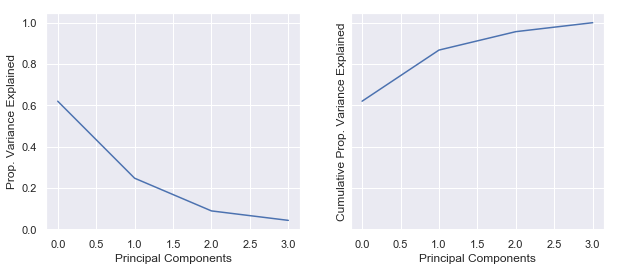

In [115]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
ax1.plot(pca.explained_variance_ratio_)
ax1.set_ylabel('Prop. Variance Explained')
ax1.set_xlabel('Principal Components')
ax2.plot(np.cumsum(pca.explained_variance_ratio_))
ax2.set_ylabel('Cumulative Prop. Variance Explained')
ax2.set_xlabel('Principal Components');

## 10.5 Lab 2: Clustering

### 10.5.1 K-Means Clustering

In [117]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [121]:
X, y = make_blobs(n_samples=50, random_state=17, centers=2)

In [148]:
km = KMeans(n_clusters=2, random_state=17).fit(X)

In [151]:
km.predict(X)

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1], dtype=int32)

In [152]:
km.labels_

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1], dtype=int32)

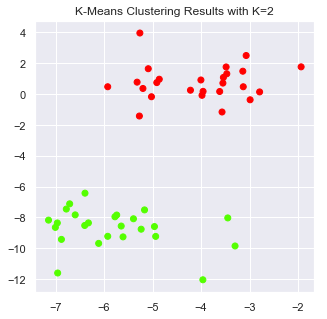

In [154]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap=plt.cm.prism)
plt.title('K-Means Clustering Results with K=2');

In [155]:
# KMeans=3

km3 = KMeans(n_clusters=3, random_state=17, n_init=20).fit(X)

In [157]:
# cluster means
km3.cluster_centers_

array([[-4.05190347,  0.73645866],
       [-5.0447472 , -9.62736763],
       [-6.32841136, -8.01782791]])

In [159]:
# cluster assignments
km3.labels_

array([1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1,
       0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       0, 0, 0, 0, 2, 1], dtype=int32)

In [163]:
# Sum of squared distances of samples to their closest cluster center.
km3.inertia_

94.40081020662961

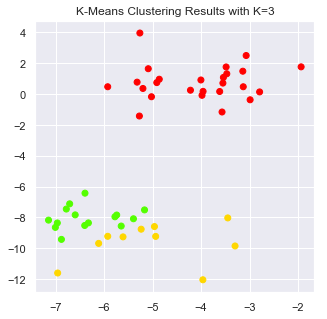

In [165]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_, cmap=plt.cm.prism)
plt.title('K-Means Clustering Results with K=3');

### 10.5.2 Hierarchical Clustering

`scipy` [reference](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) for hierarchical clustering and dendograms.

In [166]:
from scipy.cluster import hierarchy

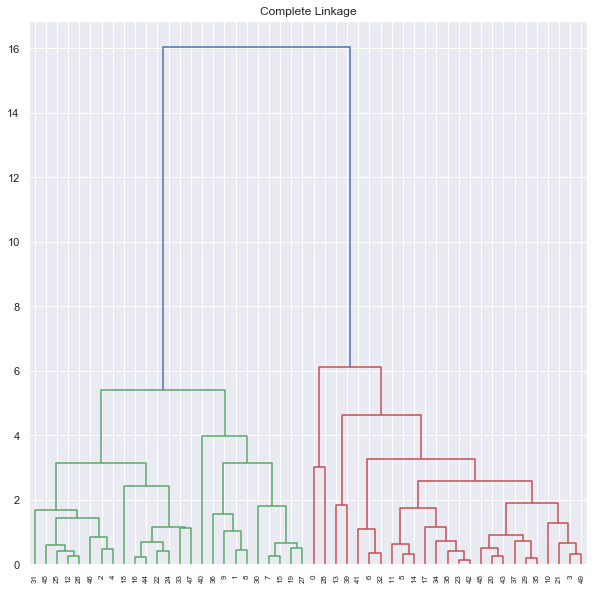

In [178]:
# complete linkage

hc_complete = hierarchy.complete(X)
fig = plt.figure(figsize=(10,10))
dn_complete = hierarchy.dendrogram(hc_complete)
plt.title('Complete Linkage')
plt.show();

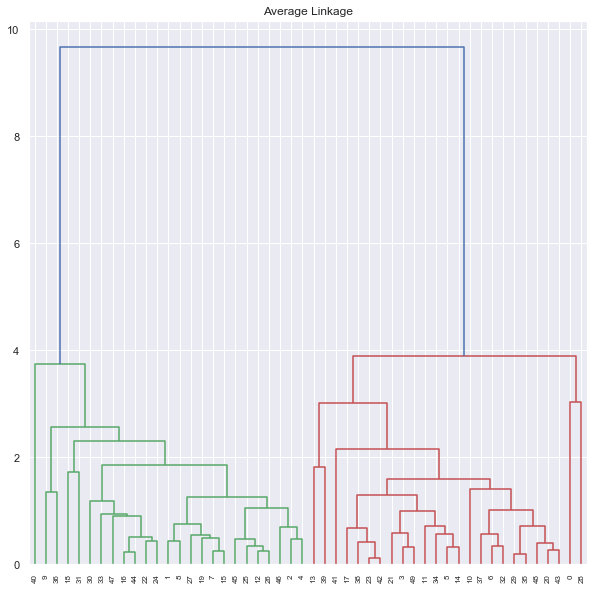

In [179]:
# average linkage

hc_average = hierarchy.average(X)
fig = plt.figure(figsize=(10,10))
dn_average = hierarchy.dendrogram(hc_average)
plt.title('Average Linkage')
plt.show();

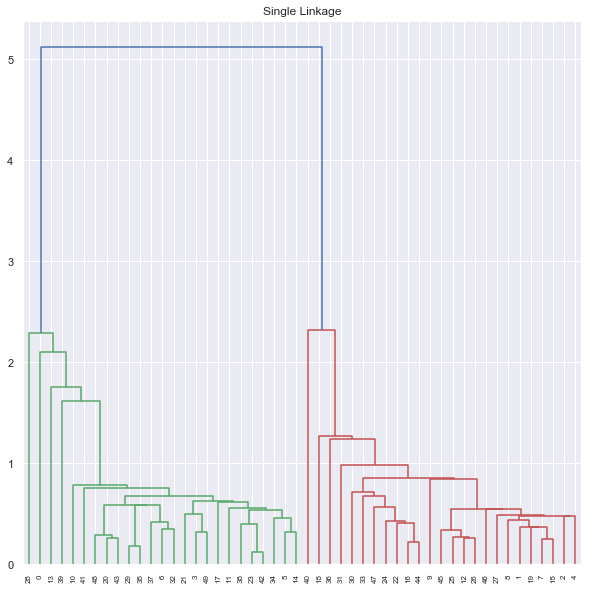

In [180]:
# single linkage

hc_single = hierarchy.single(X)
fig = plt.figure(figsize=(10,10))
dn_single = hierarchy.dendrogram(hc_single)
plt.title('Single Linkage')
plt.show();

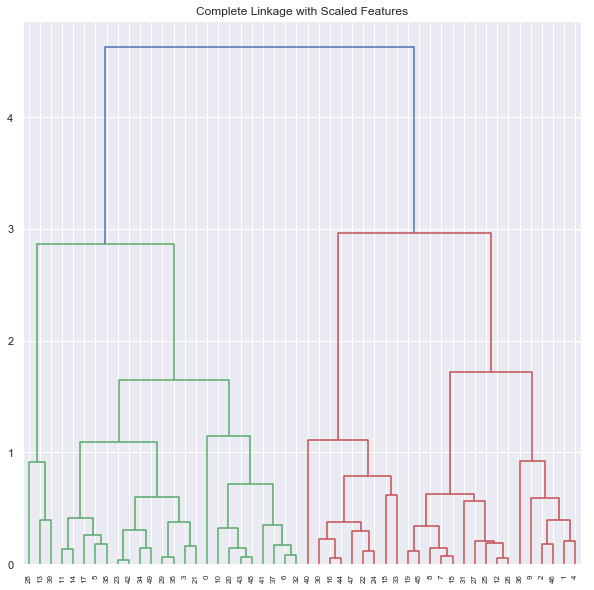

In [182]:
# scale our observations

xsc = scale(X)

hc_complete_scaled = hierarchy.complete(xsc)
fig = plt.figure(figsize=(10,10))
dn_complete_scaled = hierarchy.dendrogram(hc_complete_scaled)
plt.title('Complete Linkage with Scaled Features')
plt.show();

### 10.6 Lab 3: NC160 Data Example

In [185]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/NCI60.csv").drop('Unnamed: 0', axis=1)
print("Shape of dataframe: " + str(df.shape))
df.head()

Shape of dataframe: (64, 6831)


,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,CNS
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,CNS
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,CNS
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,RENAL
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,BREAST


In [253]:
X = scale(df.iloc[:, :-1]) # scale feature to use in pca
y = pd.DataFrame(df['labs']) # response as df for use in pca visualization

In [255]:
y.labs.value_counts()

NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
UNKNOWN        1
MCF7D-repro    1
K562B-repro    1
MCF7A-repro    1
Name: labs, dtype: int64

In [246]:
# h/t jwarmenhoven

pca2 = PCA()
df_plot = pd.DataFrame(pca2.fit_transform(X))

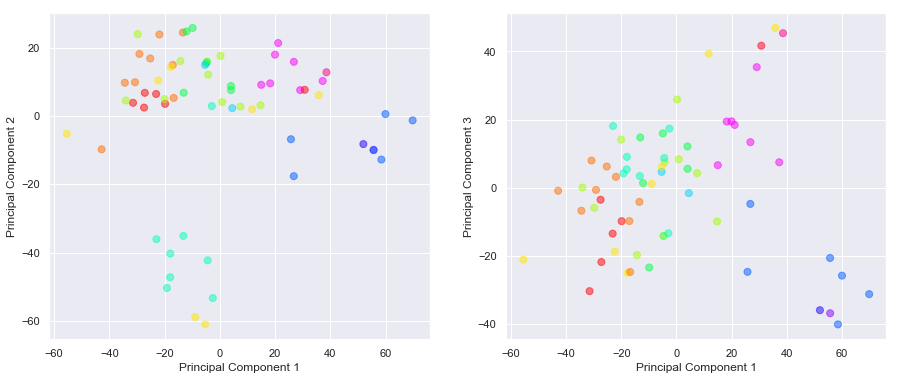

In [268]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.labs)[0]
cmap = plt.cm.hsv

ax1.scatter(df_plot.iloc[:,0], -df_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')
ax1.set_xlabel('Principal Component 1')
ax2.scatter(df_plot.iloc[:,0], df_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')
ax2.set_xlabel('Principal Component 1');

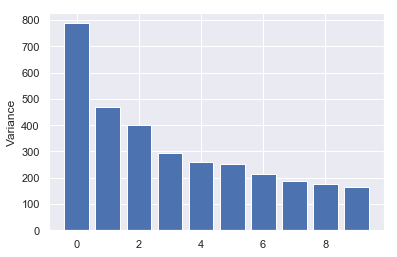

In [295]:
# plot the explained variance of the first 10 principal components

plt.bar(np.arange(10), pca2.explained_variance_[:10])
plt.ylabel('Variance');

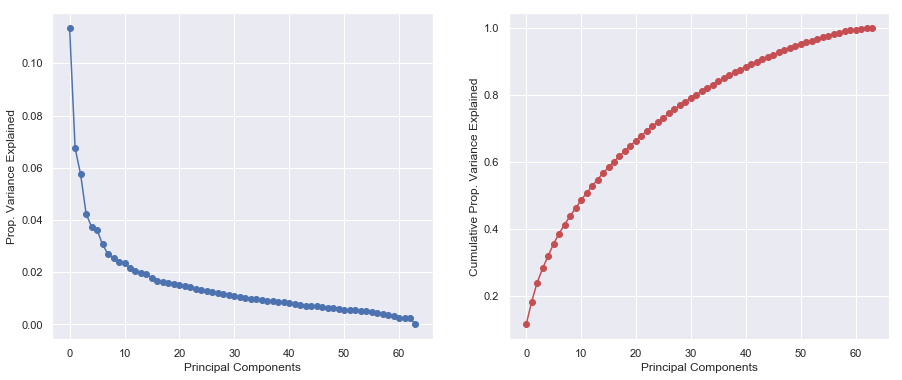

In [273]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Prop. Variance Explained')
ax1.set_xlabel('Principal Components')
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Prop. Variance Explained')
ax2.set_xlabel('Principal Components');

### 10.6.2 Clustering the Observations of the NCI60 Data

All 3 dendograms below (complete, average, and single) are using scaled data.

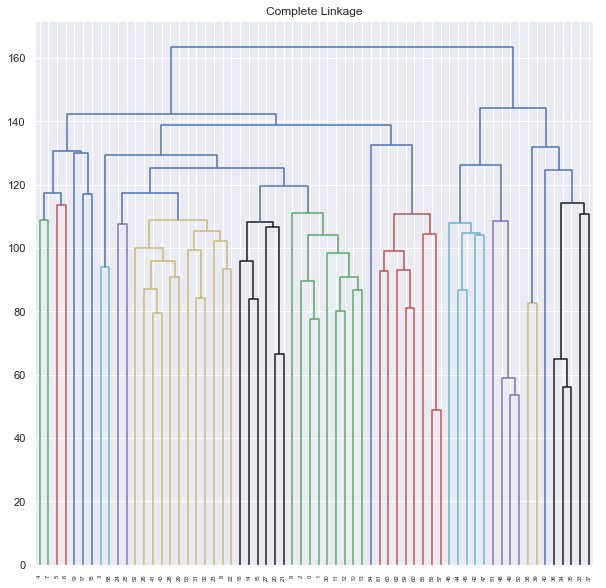

In [296]:
# complete linkage

hc_complete = hierarchy.complete(X)
fig = plt.figure(figsize=(10,10))
dn_complete = hierarchy.dendrogram(hc_complete)
plt.title('Complete Linkage')
plt.show();

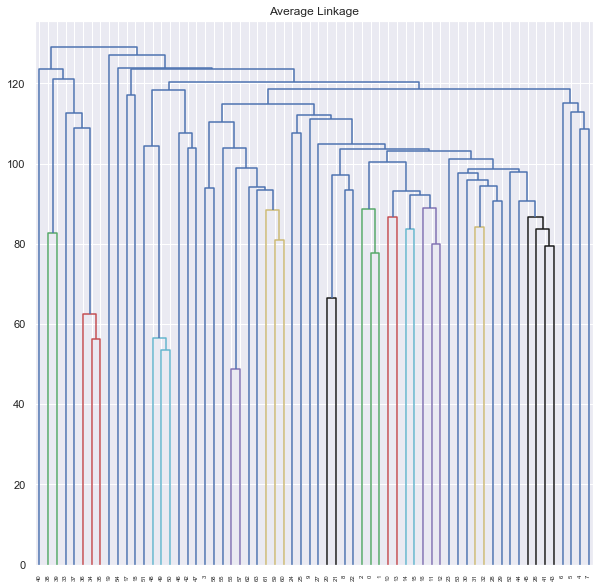

In [297]:
# average linkage

hc_average = hierarchy.average(X)
fig = plt.figure(figsize=(10,10))
dn_average = hierarchy.dendrogram(hc_average)
plt.title('Average Linkage')
plt.show();

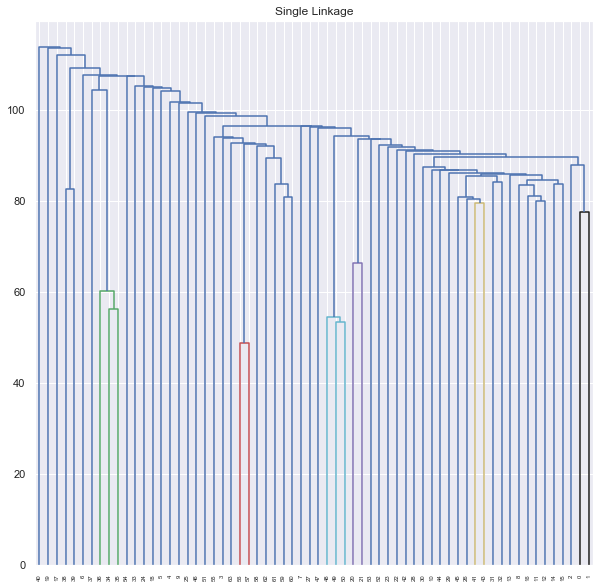

In [298]:
# single linkage

hc_single = hierarchy.single(X)
fig = plt.figure(figsize=(10,10))
dn_single = hierarchy.dendrogram(hc_single)
plt.title('Single Linkage')
plt.show();

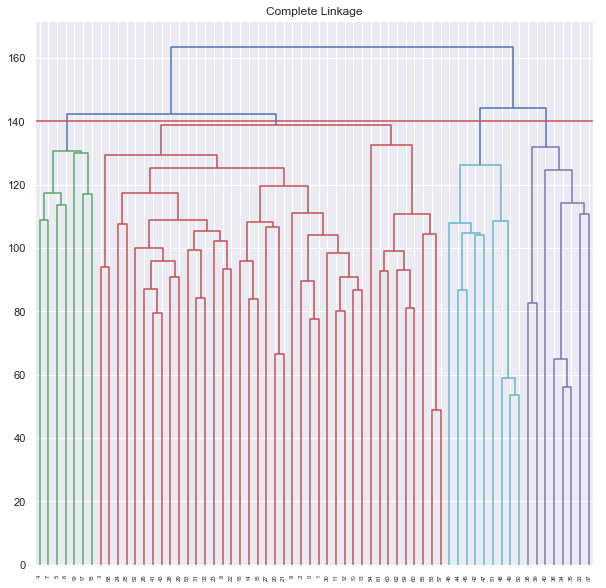

In [303]:
# threshold at 140 to form 4 clusters

hc_complete = hierarchy.complete(X)
fig = plt.figure(figsize=(10,10))
dn_complete = hierarchy.dendrogram(hc_complete, color_threshold=140)
plt.axhline(y=140, xmin=0, xmax=1, color='r') # horizontal line
plt.title('Complete Linkage')
plt.show();

In [304]:
km2 = KMeans(n_clusters=4, random_state=17, n_init=20).fit(X)

In [305]:
km2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

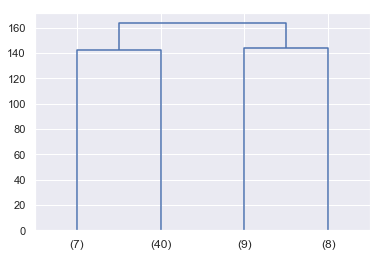

In [334]:
cut4b = hierarchy.dendrogram(hierarchy.complete(X), truncate_mode='lastp', p=4, show_leaf_counts=True)

In [371]:
cut4b['ivl']

['(7)', '(40)', '(9)', '(8)']

In [408]:
tt = [i.strip('()') for i in cut4b['ivl']] # strip '()' from list
tt = [int(i) for i in tt] # convert to int
tt = pd.Series(tt) # convert to series
tt

0     7
1    40
2     9
3     8
dtype: int64

In [390]:
tl = pd.Series(km2.labels_).value_counts().sort_index()
tl

0    18
1    10
2     6
3    30
dtype: int64

In [407]:
# concat our series to compare kmeans to hierarchical clustering

comp = pd.concat([tt,tl], axis=1)
comp.columns = ['h_clust','kmeans']
comp.index.names=['cluster']
comp

,h_clust,kmeans
cluster,,
0,7,18
1,40,10
2,9,6
3,8,30


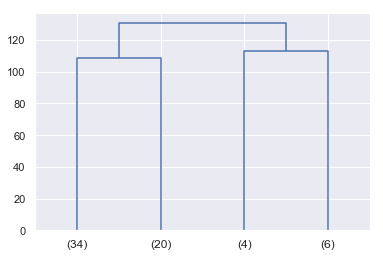

In [411]:
cut4c = hierarchy.dendrogram(hierarchy.complete(df_plot.iloc[:,:5]), truncate_mode='lastp', p=4,
                             show_leaf_counts=True)

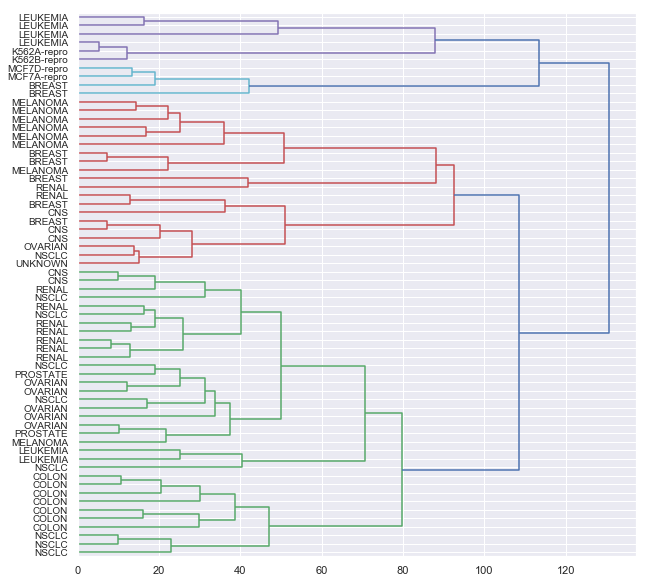

In [414]:
# hclust with our first 5 principal components

hc_complete = hierarchy.complete(df_plot.iloc[:,:5])
fig = plt.figure(figsize=(10,10))
dn_complete = hierarchy.dendrogram(hc_complete, labels=y.labs.values,
                                   orientation='right', color_threshold=100,
                                   leaf_font_size=10)
plt.show();

In [420]:
pd.crosstab(km2.labels_, y.labs, rownames=['cluster'])

labs,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,MCF7A-repro,MCF7D-repro,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
cluster,,,,,,,,,,,,,,
0,2,5,0,0,0,0,0,0,0,3,1,0,7,0
1,2,0,0,0,0,1,0,0,7,0,0,0,0,0
2,0,0,0,1,1,4,0,0,0,0,0,0,0,0
3,3,0,7,0,0,1,1,1,1,6,5,2,2,1
